## Calculating Lead Return with Rule-Based Classification

In this project, I calculate average income from upcoming customer. I use customer's preferences for calculating. I will make level-based new customer definitions.

**For example**,*What is average income from a person who is 25 years old from Turkey?*

### Project Purpose And Steps
* Thinking about the concept of persona
* To be able to define new customers according to the levels.
* Simply segment new customer definitions using the qcut funtion.
* When a new customer arrives, classify them according to segment

In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

Firstly load data from csv file:

In [4]:
df = pd.read_csv('persona.csv')

After that showing data:

In [5]:
df.head(5)

,PRICE,SOURCE,SEX,COUNTRY,AGE
0,39,android,male,bra,17
1,39,android,male,bra,17
2,49,android,male,bra,17
3,29,android,male,tur,17
4,49,android,male,tur,17


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   PRICE    5000 non-null   int64 
 1   SOURCE   5000 non-null   object
 2   SEX      5000 non-null   object
 3   COUNTRY  5000 non-null   object
 4   AGE      5000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 234.4+ KB


As we see that we have for futures in data. All datas are non-null. SOURCE, SEX and COUNTRY datas are categorical data if they are not cardinal.

### Unique Controls

In [7]:
df["SOURCE"].nunique()

2

For SOURCE data, we have two unique data.

<AxesSubplot:>

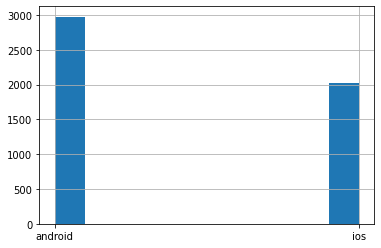

In [8]:
df["SOURCE"].hist()

Nearly 2000 customers use android and nearly 3000 customers use android. As we saw SOURCE data is categorical data.

In [9]:
df["PRICE"].nunique()

6

For PRICE data, we have six unique data.

<AxesSubplot:>

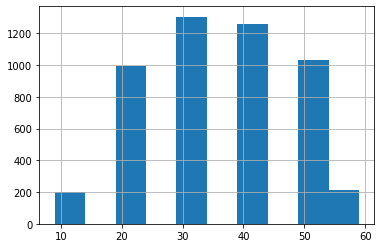

In [10]:
df["PRICE"].hist()

This histograms show us how many sold phone which price.

<AxesSubplot:>

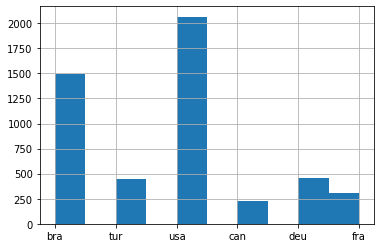

In [11]:
df["COUNTRY"].hist()

This histogram shows us sold phone numbers about countries.

In [12]:
df.groupby("COUNTRY")["PRICE"].sum()

COUNTRY
bra    51354
can     7730
deu    15485
fra    10177
tur    15689
usa    70225
Name: PRICE, dtype: int64

On the above, total price for countries. When we are interested in, USA is the first to buying phone.

### Income Means for Features

In [13]:
df.groupby("COUNTRY")["PRICE"].mean()

COUNTRY
bra    34.327540
can    33.608696
deu    34.032967
fra    33.587459
tur    34.787140
usa    34.007264
Name: PRICE, dtype: float64

These outputs are the mean prices for countries.

In [14]:
df.groupby("SOURCE")["PRICE"].mean()

SOURCE
android    34.174849
ios        34.069102
Name: PRICE, dtype: float64

For the SOURCE, ios is cheaper than android.

In [15]:
df.groupby(["COUNTRY", "SOURCE"]).agg({"PRICE": ["mean"]})

PRICE
                      mean
COUNTRY SOURCE            
bra     android  34.387029
        ios      34.222222
can     android  33.330709
        ios      33.951456
deu     android  33.869888
        ios      34.268817
fra     android  34.312500
        ios      32.776224
tur     android  36.229437
        ios      33.272727
usa     android  33.760357
        ios      34.371703

On the above, It is price mean for country-source groups.

In [16]:
df.groupby(["COUNTRY", "SOURCE", "SEX", "AGE"]).agg({"PRICE": ["mean"]})

PRICE
                                 mean
COUNTRY SOURCE  SEX    AGE           
bra     android female 15   38.714286
                       16   35.944444
                       17   35.666667
                       18   32.255814
                       19   35.206897
...                               ...
usa     ios     male   42   30.250000
                       50   39.000000
                       53   34.000000
                       55   29.000000
                       59   46.500000

[348 rows x 1 columns]

On the above, It is price mean for country-source-sex-age groups.

In [17]:
agg_df = df.groupby(["COUNTRY", "SOURCE", "SEX", "AGE"])["PRICE"].mean().sort_values(ascending=False)
agg_df

COUNTRY  SOURCE   SEX     AGE
bra      android  male    46     59.0
usa      android  male    36     59.0
fra      android  female  24     59.0
usa      ios      male    32     54.0
deu      android  female  36     49.0
                                 ... 
usa      ios      female  38     19.0
                          30     19.0
can      android  female  27     19.0
fra      android  male    18     19.0
deu      android  male    26      9.0
Name: PRICE, Length: 348, dtype: float64

In [18]:
agg_df = agg_df.reset_index()
agg_df

,COUNTRY,SOURCE,SEX,AGE,PRICE
0,bra,android,male,46,59.0
1,usa,android,male,36,59.0
2,fra,android,female,24,59.0
3,usa,ios,male,32,54.0
4,deu,android,female,36,49.0
...,...,...,...,...,...
343,usa,ios,female,38,19.0
344,usa,ios,female,30,19.0
345,can,android,female,27,19.0
346,fra,android,male,18,19.0


I added index to dataframe in here.

Let's do AGE to categoric values for understanding.

In [19]:
def set_age_range(age):
    """
    This function gives us age range for the input age.

    Args:
        age (int): age
    
    Returns:
        age_range: '0_18', '19_23', '24_30', '31_40', '41_70'
    """

    if 18 >= age >= 0:
        return '0_18'

    elif 23 >= age >= 19:
        return '19_23'

    elif 40 >= age >= 31:
        return '24_30'
    
    elif 70 >= age >= 41:
        return '31_40'
    
    else:
        return '41_70'

In [20]:
age_cat = [set_age_range(age) for age in agg_df["AGE"].values]
agg_df["AGE_CAT"] = age_cat
agg_df

,COUNTRY,SOURCE,SEX,AGE,PRICE,AGE_CAT
0,bra,android,male,46,59.0,31_40
1,usa,android,male,36,59.0,24_30
2,fra,android,female,24,59.0,41_70
3,usa,ios,male,32,54.0,24_30
4,deu,android,female,36,49.0,24_30
...,...,...,...,...,...,...
343,usa,ios,female,38,19.0,24_30
344,usa,ios,female,30,19.0,41_70
345,can,android,female,27,19.0,41_70
346,fra,android,male,18,19.0,0_18


I categorize to age because I want to see phone usage for age range.

### Level Based Persona

In [21]:
customer_level_based = list(map(lambda x: x[0].upper() + "_" + x[1].upper() + "_" + x[2].upper() + "_" + x[3].upper(), zip(agg_df["COUNTRY"], agg_df["SOURCE"], agg_df["SEX"], agg_df["AGE_CAT"])))
agg_df["customers_level_based"] = customer_level_based
agg_df

,COUNTRY,SOURCE,SEX,AGE,PRICE,AGE_CAT,customers_level_based
0,bra,android,male,46,59.0,31_40,BRA_ANDROID_MALE_31_40
1,usa,android,male,36,59.0,24_30,USA_ANDROID_MALE_24_30
2,fra,android,female,24,59.0,41_70,FRA_ANDROID_FEMALE_41_70
3,usa,ios,male,32,54.0,24_30,USA_IOS_MALE_24_30
4,deu,android,female,36,49.0,24_30,DEU_ANDROID_FEMALE_24_30
...,...,...,...,...,...,...,...
343,usa,ios,female,38,19.0,24_30,USA_IOS_FEMALE_24_30
344,usa,ios,female,30,19.0,41_70,USA_IOS_FEMALE_41_70
345,can,android,female,27,19.0,41_70,CAN_ANDROID_FEMALE_41_70
346,fra,android,male,18,19.0,0_18,FRA_ANDROID_MALE_0_18


In [22]:
agg_df = agg_df.drop("AGE", axis=1)
agg_df = agg_df.drop("COUNTRY", axis=1)
agg_df = agg_df.drop("SEX", axis=1)
agg_df = agg_df.drop("SOURCE", axis=1)
agg_df = agg_df.drop("AGE_CAT", axis=1)
agg_df

,PRICE,customers_level_based
0,59.0,BRA_ANDROID_MALE_31_40
1,59.0,USA_ANDROID_MALE_24_30
2,59.0,FRA_ANDROID_FEMALE_41_70
3,54.0,USA_IOS_MALE_24_30
4,49.0,DEU_ANDROID_FEMALE_24_30
...,...,...
343,19.0,USA_IOS_FEMALE_24_30
344,19.0,USA_IOS_FEMALE_41_70
345,19.0,CAN_ANDROID_FEMALE_41_70
346,19.0,FRA_ANDROID_MALE_0_18


In [23]:
agg_df = agg_df[["customers_level_based", "PRICE"]]
agg_df

,customers_level_based,PRICE
0,BRA_ANDROID_MALE_31_40,59.0
1,USA_ANDROID_MALE_24_30,59.0
2,FRA_ANDROID_FEMALE_41_70,59.0
3,USA_IOS_MALE_24_30,54.0
4,DEU_ANDROID_FEMALE_24_30,49.0
...,...,...
343,USA_IOS_FEMALE_24_30,19.0
344,USA_IOS_FEMALE_41_70,19.0
345,CAN_ANDROID_FEMALE_41_70,19.0
346,FRA_ANDROID_MALE_0_18,19.0


I make customers level based categorized on the above.

In [24]:
segments = pd.qcut(agg_df["PRICE"], 4, labels=["D", "C", "B", "A"])
agg_df["SEGMENT"] = segments
agg_df

C:\Users\talha\AppData\Local\Temp\ipykernel_20936\909438926.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agg_df["SEGMENT"] = segments


,customers_level_based,PRICE,SEGMENT
0,BRA_ANDROID_MALE_31_40,59.0,A
1,USA_ANDROID_MALE_24_30,59.0,A
2,FRA_ANDROID_FEMALE_41_70,59.0,A
3,USA_IOS_MALE_24_30,54.0,A
4,DEU_ANDROID_FEMALE_24_30,49.0,A
...,...,...,...
343,USA_IOS_FEMALE_24_30,19.0,D
344,USA_IOS_FEMALE_41_70,19.0,D
345,CAN_ANDROID_FEMALE_41_70,19.0,D
346,FRA_ANDROID_MALE_0_18,19.0,D


I set to segmentation for the customers here.

In [25]:
agg_df.groupby("SEGMENT").agg({"PRICE": ["mean", "min", "max", "sum"]})

PRICE                                   
              mean        min        max          sum
SEGMENT                                              
D        27.302596   9.000000  31.105263  2375.325850
C        32.933339  31.173913  34.000000  3128.667165
B        35.436170  34.185185  37.000000  2870.329792
A        41.434736  37.095238  59.000000  3521.952577

In this output, we can see mean, min, max, sum of segments.

### New Users Income Check

In [28]:
def calculate_income_from_user(country, source, sex, age):
    user = country.upper() + "_" + source.upper() + "_" + sex.upper() + "_" + set_age_range(age)

    return agg_df[agg_df["customers_level_based"] == user]

In [29]:
calculate_income_from_user("tur", "android", "female", 33)

,customers_level_based,PRICE,SEGMENT
18,TUR_ANDROID_FEMALE_24_30,43.000000,A
35,TUR_ANDROID_FEMALE_24_30,40.666667,A


In [30]:
calculate_income_from_user("fra", "android", "female", 35)

,customers_level_based,PRICE,SEGMENT
185,FRA_ANDROID_FEMALE_24_30,34.0,C
